<a href="https://colab.research.google.com/github/diegormsouza/Geo-Sat-Python-Mar-2021/blob/main/Curso_GOES_16_202103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CURSO: PROCESSAMENTO DE DADOS DE SATÉLITES GEOESTACIONÁRIOS COM PYTHON** 
INPE / CGCT / DISSM

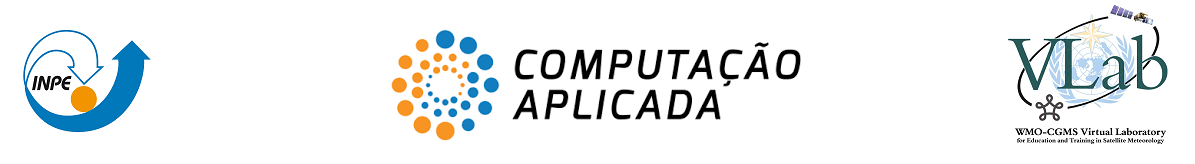

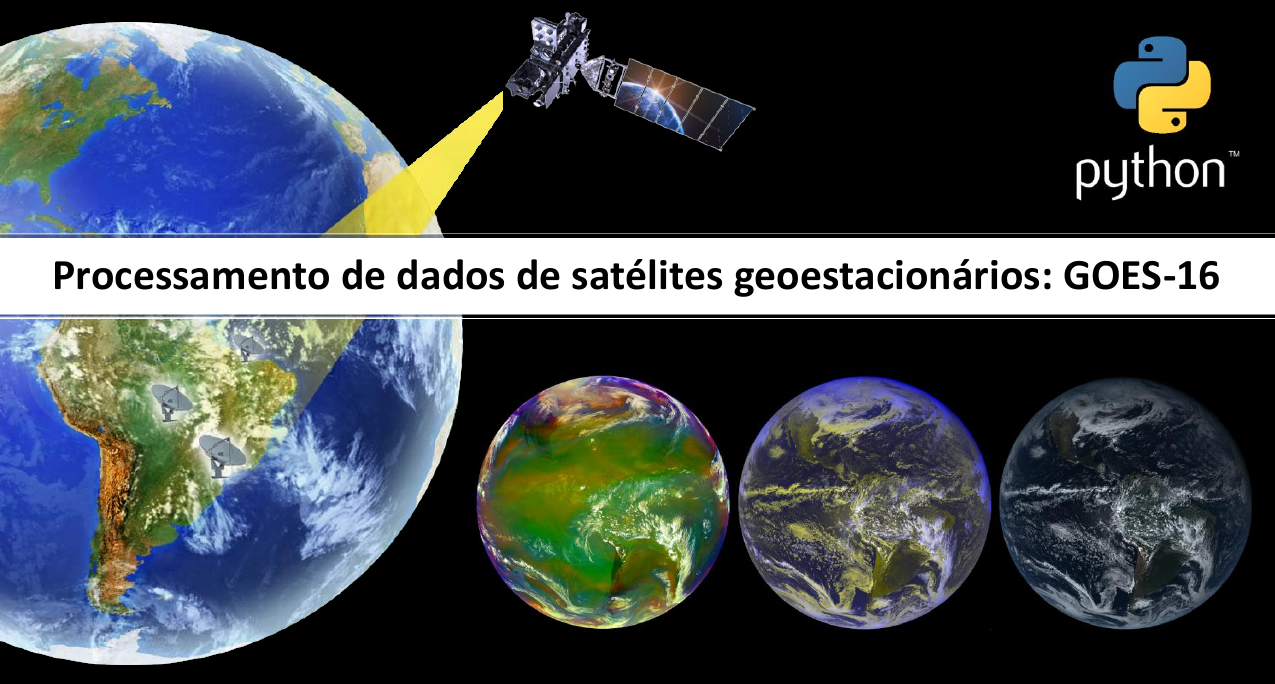

### **Contato:**
####Rogério Batista - INPE / CGCT / DISSM - (rogerio.batista@inpe.br)
####Diego Souza - INPE / CGCT / DISSM - (diego.souza@inpe.br)

# Introdução

Bem vindos ao curso **"Processamento de Dados de Satélites com Python"**! 


---


Este "notebook" interativo contém instruções para a instalação das ferramentas necessárias para a criação de scripts Python para a manipulação dos dados mostrados no curso. Todas as instruções e scripts são executados na nuvem, não sendo necessário instalar as ferramentas e baixar arquivos localmente. Para executar as instruções, clicar no ícone "Play" entre colchetes à esquerda de cada célula.

## Gravação do Curso (Março de 2021):

In [ ]:
# Visualização de vídeos Youtube via IPython
from IPython.display import YouTubeVideo
YouTubeVideo('https://www.youtube.com/watch?v=ESlTKAGRgbY')

# 1° Passo: Verificações Preliminares

In [ ]:
# Verificando configuração da máquina
!cat /etc/issue
!uname -a
print('\n')

# Verificando a memória
!grep MemTotal /proc/meminfo
print('\n')

# Verificando o HD
!df -h
print('\n')

# Verificando qual o diretório da instalação padrão do Python
!which python
print('\n')

# Verificando qual a versão instalada do Python
!python --version
print('\n')

## 2° Passo: Instalando as Bibliotecas Necessárias

In [ ]:
# Instalando a Biblioteca NetCDF4
!pip install netcdf4

# Instalando a Biblioteca Cartopy
!pip install cartopy
!pip install shapely --no-binary shapely --force

# Instalando a Biblioteca Boto3
!pip install boto3

# Instalando / atualizando a Biblioteca GDAL
!apt-add-repository -y ppa:ubuntugis/ubuntugis-unstable
!add-apt-repository -y ppa:ubuntugis/ppa
!apt-get install gdal-bin
!pip install 'gdal==3.0.4'

##3° Passo: Download de Arquivos Auxiliares 

In [ ]:
# Download do script utilities.py
!wget -c https://www.dropbox.com/s/i8j1g9xg1g7o56l/utilities.py

# Download do shapefile dos estados brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
!unzip br_unidades_da_federacao.zip

# Download da arquivo CPT exemplo
!wget -c https://www.dropbox.com/s/fdgnaqt91cy3x97/IR4AVHRR6.cpt

# Download de dados pluviométricos
!wget -c https://www.dropbox.com/s/1ii0x5x87322rl5/pluvio_inmet_20201217.txt

# Criação dos diretórios de Amostras e Saída
!mkdir -p Samples
!mkdir -p Output

# Download de Amostras GOES-16
!wget -c https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2019/198/12/OR_ABI-L2-CMIPF-M6C08_G16_s20191981200396_e20191981210104_c20191981210182.nc -P /content/Samples/
!wget -c https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2019/198/12/OR_ABI-L2-CMIPF-M6C10_G16_s20191981200396_e20191981210116_c20191981210188.nc -P /content/Samples/
!wget -c https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2019/198/12/OR_ABI-L2-CMIPF-M6C12_G16_s20191981200396_e20191981210111_c20191981210185.nc -P /content/Samples/
!wget -c https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2019/198/12/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc -P /content/Samples/
!wget -c https://noaa-goes16.s3.amazonaws.com/GLM-L2-LCFA/2019/198/12/OR_GLM-L2-LCFA_G16_s20191981200000_e20191981200200_c20191981200224.nc -P /content/Samples/

##Script 01: Plot Básico / Extraindo os Valores dos Pixels


*Basic Plot / Extracting Pixel Values*

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 1 - Basic Plot / Extracting Pixel Values
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset      # Read / Write NetCDF4 files
import matplotlib.pyplot as plt  # Plotting library
#----------------------------------------------------------------------------------------------------------- 
# Open the GOES-R image 
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset("Samples/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc")
 
# Get the pixel values
data = file.variables['CMI'][:]
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))
 
# Plot the image
plt.imshow(data, vmin=193, vmax=313, cmap='Greys')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Output/Image_01.png')

# Show the image
plt.show()

##Script 02: Cálculo Básico / Legenda / Título / Data

Basic Operation / Colorbar / Title / Date

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 2 - Basic Operation / Colorbar / Title / Date
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset      # Read / Write NetCDF4 files
import matplotlib.pyplot as plt  # Plotting library
from datetime import datetime    # Basic Dates and time types
#----------------------------------------------------------------------------------------------------------- 
# Open the GOES-R image
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset("/content/Samples/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc")
 
# Get the pixel values
data = file.variables['CMI'][:] - 273.15
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))
 
# Plot the image
plt.imshow(data, vmin=-80, vmax=40, cmap='jet')
 
# Add a colorbar
plt.colorbar(label='Brightness Temperature (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('/content/Output/Image_02.png')
 
# Show the image
plt.show()


##Script 03: Adicionando Mapas com a Cartopy

 Adding a Map with Cartopy

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 3 - Adding a Map with Cartopy (Readin parameters from header)
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset          # Read / Write NetCDF4 files
import matplotlib.pyplot as plt      # Plotting library
from datetime import datetime        # Basic Dates and time types
import cartopy, cartopy.crs as ccrs  # Plot maps
#----------------------------------------------------------------------------------------------------------- 
# Open the GOES-R image
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset("/content/Samples/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc")
 
# Get the pixel values
data = file.variables['CMI'][:] - 273.15
#----------------------------------------------------------------------------------------------------------- 
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))
 
# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)
 
# Add coastlines, borders and gridlines
ax.coastlines(resolution='110m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)
 
# Plot the image
img = ax.imshow(data, vmin=-80, vmax=40, origin='upper', extent=img_extent, cmap='Greys')
 
# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)
 
# Extract date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('/content/Output/Image_03.png')
 
# Show the image
plt.show()

##Script 04: Adicionando Mapas com a Cartopy (Lendo Metadados)

Adding a Map with Cartopy (reading parameters from header)

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 4 - Adding a Map with Cartopy
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset          # Read / Write NetCDF4 files
import matplotlib.pyplot as plt      # Plotting library
from datetime import datetime        # Basic Dates and time types
import cartopy, cartopy.crs as ccrs  # Plot maps
#----------------------------------------------------------------------------------------------------------- 
# Open the GOES-R image
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset("/content/Samples/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc")
 
# Get the pixel values
data = file.variables['CMI'][:] - 273.15
#----------------------------------------------------------------------------------------------------------- 
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))

# Use the Geostationary projection in cartopy
longitude_of_projection_origin = file.variables['goes_imager_projection'].longitude_of_projection_origin
perspective_point_height = file.variables['goes_imager_projection'].perspective_point_height
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=longitude_of_projection_origin, satellite_height=perspective_point_height))

# Extent of data in decimais (2712*0.000056*35786023.0)
xmin = file.variables['x'][:].min()*perspective_point_height
xmax = file.variables['x'][:].max()*perspective_point_height
ymin = file.variables['y'][:].min()*perspective_point_height
ymax = file.variables['y'][:].max()*perspective_point_height
img_extent = (xmin, xmax, ymin, ymax)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='110m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)
 
# Plot the image
img = ax.imshow(data, vmin=-80, vmax=40, origin='upper', extent=img_extent, cmap='Greys')
 
# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)
 
# Extract date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('/content/Output/Image_04.png')
 
# Show the image
plt.show()

##Script 05: Adicionando um Shapefile

Reading a Shapefile 

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 5 - Reading a Shapefile
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset                # Read / Write NetCDF4 files
import matplotlib.pyplot as plt            # Plotting library
from datetime import datetime              # Basic Dates and time types
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
#-----------------------------------------------------------------------------------------------------------
# Open the GOES-R image
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset("/content/Samples/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc")
 
# Get the pixel values, and convert to Celsius
data = file.variables['CMI'][:] - 273.15
#----------------------------------------------------------------------------------------------------------- 
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)
 
# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('/content/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gold',facecolor='none', linewidth=0.3)
 
# Add coastlines, borders and gridlines
ax.coastlines(resolution='110m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.8)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)
 
# Plot the image
img = ax.imshow(data, vmin=-80, vmax=40, origin='upper', extent=img_extent, cmap='Greys')
 
# Add a colorbar
plt.colorbar(img, label='Brightness Temperature (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)
 
# Extract date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('/content/Output/Image_05.png')
 
# Show the image
plt.show()

##Script 06: ABI + GLM (Plot Básico)

ABI + GLM (Basic Plot)

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 6 - ABI and GLM 
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset          # Read / Write NetCDF4 files
import matplotlib.pyplot as plt      # Plotting library
from datetime import datetime        # Basic Dates and time types
import cartopy, cartopy.crs as ccrs  # Plot maps
#----------------------------------------------------------------------------------------------------------- 
# Open the GOES-R image
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset("/content/Samples/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc")
 
# Get the pixel values
data = file.variables['CMI'][:] - 273.15
 
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))
 
# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)
 
# Add coastlines, borders and gridlines
ax.coastlines(resolution='110m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)
 
# Plot the image
img = ax.imshow(data, vmin=-80, vmax=40, origin='upper', extent=img_extent, cmap='Greys')
#-----------------------------------------------------------------------------------------------------------
# Open the GLM file
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
fileGLM = Dataset("/content/Samples/OR_GLM-L2-LCFA_G16_s20191981200000_e20191981200200_c20191981200224.nc") 
 
e_lats = fileGLM.variables['event_lat'][:]
e_lons = fileGLM.variables['event_lon'][:]

g_lats = fileGLM.variables['group_lat'][:]
g_lons = fileGLM.variables['group_lon'][:]

f_lats = fileGLM.variables['flash_lat'][:]
f_lons = fileGLM.variables['flash_lon'][:] 

img2 = ax.plot(e_lons,e_lats,'.r', markersize=10, transform=ccrs.PlateCarree(), alpha=0.01)
img3 = ax.plot(g_lons,g_lats,'.y', markersize=5, transform=ccrs.PlateCarree(), alpha=0.5)
img4 = ax.plot(f_lons,f_lats,'.g', markersize=2.5, transform=ccrs.PlateCarree(), alpha=1)
#-----------------------------------------------------------------------------------------------------------
# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)
 
# Extract date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 Band 13 and GLM ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('/content/Output/Image_06.png')
 
# Show the image
plt.show()


##Script 07: Criação de Composições RGB 

RGB Composite Creation

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 7 - RGB Creation
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset                # Read / Write NetCDF4 files
import matplotlib.pyplot as plt            # Plotting library
from datetime import datetime              # Basic Dates and time types
import cartopy, cartopy.crs as ccrs        # Plot maps
import numpy as np                         # Import the Numpy packag
#-----------------------------------------------------------------------------------------------------------
# Open the GOES-R image
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file1 = Dataset("/content/Samples/OR_ABI-L2-CMIPF-M6C08_G16_s20191981200396_e20191981210104_c20191981210182.nc")
# Get the pixel values, and convert to Celsius
data1 = file1.variables['CMI'][:,:][::4 ,::4] - 273.15

# Open the GOES-R image
file2 = Dataset("/content/Samples/OR_ABI-L2-CMIPF-M6C10_G16_s20191981200396_e20191981210116_c20191981210188.nc")
# Get the pixel values, and convert to Celsius
data2 = file2.variables['CMI'][:,:][::4 ,::4] - 273.15

# Open the GOES-R image
file3 = Dataset("/content/Samples/OR_ABI-L2-CMIPF-M6C12_G16_s20191981200396_e20191981210111_c20191981210185.nc")
# Get the pixel values, and convert to Celsius
data3 = file3.variables['CMI'][:,:][::4 ,::4] - 273.15

# Open the GOES-R image
file4 = Dataset("/content/Samples/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc")
# Get the pixel values, and convert to Celsius
data4 = file4.variables['CMI'][:,:][::4 ,::4] - 273.15
#-----------------------------------------------------------------------------------------------------------
# RGB Quick Guide: http://rammb.cira.colostate.edu/training/visit/quick_guides/QuickGuide_GOESR_AirMassRGB_final.pdf 

# RGB Components
R = data1 - data2
G = data3 - data4
B = data1
 
# Minimuns, Maximuns and Gamma
Rmin = -26.2
Rmax = 0.6

Gmin = -43.2
Gmax = 6.7

Bmin = -29.25
Bmax = -64.65

R[R > Rmax] = Rmax
R[R < Rmin] = Rmin

G[G > Gmax] = Gmax
G[G < Gmin] = Gmin

B[B < Bmax] = Bmax # Inverted!
B[B > Bmin] = Bmin # Inverted!

gamma_R = 1
gamma_G = 1
gamma_B = 1
 
# Normalize the data
R = ((R - Rmin) / (Rmax - Rmin)) ** (1/gamma_R)
G = ((G - Gmin) / (Gmax - Gmin)) ** (1/gamma_G)
B = ((B - Bmin) / (Bmax - Bmin)) ** (1/gamma_B) 

# Create the RGB
RGB = np.stack([R, G, B], axis=2)

# Eliminate values outside the globe
mask = (RGB == [R[0,0],G[0,0],B[0,0]]).all(axis=2)
RGB[mask] = np.nan
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7)) 
 
# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.8)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)
 
# Plot the image
img = ax.imshow(RGB, origin='upper', extent=img_extent)

# Extract date
date = (datetime.strptime(file1.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 Airmass RGB ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('/content/Output/Image_07.png')
 
# Show the image
plt.show()

##Script 08: Paletas de Cores Customizadas - Realçando Canais IR

 Custom Colormaps - Enhancing IR Channels

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 8 - Custom Colormaps - Enhancing IR Channels
#----------------------------------------------------------------------------------------------------------- 
# Required modules
from netCDF4 import Dataset          # Read / Write NetCDF4 files
import matplotlib.pyplot as plt      # Plotting library
from datetime import datetime        # Basic Dates and time types
from matplotlib import cm            # Colormap handling utilities
import numpy as np                   # Scientific computing with Python
from utilities import loadCPT        # Import the CPT convert function
#----------------------------------------------------------------------------------------------------------- 

# COLORMAP EXAMPLE 1
# Custom colormap joining matplotlib colormaps
# Available matplotlib colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

vmin1 = -80                                                       # Min. value
vmax1 = 40                                                        # Max. value

gray_cmap = cm.get_cmap('gray_r', 120)                            # Read the reversed 'gray' cmap
gray_cmap = gray_cmap(np.linspace(0, 1, 120))                     # Create the array
jet_cmap  = cm.get_cmap('jet_r', 40)                              # Read the reversed 'jet' cmap 
jet_cmap  = jet_cmap(np.linspace(0, 1, 40))                       # Create the array
gray_cmap[:40, :] = jet_cmap                                      # Join both cmaps arrays
my_cmap1 = cm.colors.ListedColormap(gray_cmap)                    # Create the custom colormap

#-----------------------------------------------------------------------------------------------------------

# COLORMAP EXAMPLE 2 
# Creating the INPE DISSM IR colormap
# Online color picker: https://imagecolorpicker.com/

vmin2 = -80                                                       # Min. value
vmax2 = 40                                                        # Max. value

gray_cmap = cm.get_cmap('gray_r', 120)                            # Read the reversed 'gray' cmap
gray_cmap = gray_cmap(np.linspace(0, 1, 120))                     # Create the array
colors = ["#ffa0ff", "#0806ff", "#3bcfff", "#feff65", "#ff7516"]  # Custom colors
my_colors = cm.colors.ListedColormap(colors)                      # Create a custom colormap
my_colors = my_colors(np.linspace(0, 1, 50))                      # Create the array
gray_cmap[:50, :] = my_colors                                     # Join both cmaps arrays
my_cmap2 = cm.colors.ListedColormap(gray_cmap)                    # Create the custom colormap 

#-----------------------------------------------------------------------------------------------------------

# COLORMAP EXAMPLE 3
# Creating a linear colormap
# Online color picker: https://imagecolorpicker.com/

colors = ["#bc8462", "#ae656f", "#a44a79", "#962e97", "#6158c5", "#2b8ffb", "#5fcdff", "#94fff0", "#a5ff94", "#fff88c", "#ffbf52", "#ec7b27", "#b84827", "#a1333d", "#bd5478", "#cc6a99", "#d982b8"]
my_cmap3 = cm.colors.LinearSegmentedColormap.from_list("", colors)# Create a custom linear colormap
vmin3 = -80                                                       # Min. value
vmax3 = 40                                                        # Max. value

#-----------------------------------------------------------------------------------------------------------

# COLORMAP EXAMPLE 4
# Converts a CPT file to be used in Python
# CPT archive: http://soliton.vm.bytemark.co.uk/pub/cpt-city/

cpt = loadCPT('/content/IR4AVHRR6.cpt')                   # Load the CPT file   
my_cmap4 = cm.colors.LinearSegmentedColormap('cpt', cpt)          # Create a custom linear colormap
vmin4 = -103.0                                                    # Min. value
vmax4 = 84.0                                                      # Max. value

#-----------------------------------------------------------------------------------------------------------
# Open the GOES-R image
# Download files at this link: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi
file = Dataset("/content/Samples/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc")
 
# Get the pixel values
data = file.variables['CMI'][:] - 273.15

#----------------------------------------------------------------------------------------------------------- 

# Choose the plot size (width x height, in inches)
fig, axs = plt.subplots(2,2, figsize=(10,10)) # 2 rows x 2 columns
 
#-----------------------------------------------------------------------------------------------------------
# Plot 1 (first row, first column)

# Plot the image
img1 = axs[0,0].imshow(data, vmin=vmin1, vmax=vmax1, origin='upper', cmap=my_cmap1)
 
# Add a colorbar
plt.colorbar(img1, extend='both', orientation='vertical', pad=0.05, fraction=0.05, ax=axs[0,0])
 
# Add a title
axs[0,0].set_title('Example 1 - Joining 2 cmaps', fontweight='bold', fontsize=10, loc='center')
#-----------------------------------------------------------------------------------------------------------
# Plot 2 (first row, second column)

# Plot the image
img2 = axs[0,1].imshow(data, vmin=vmin2, vmax=vmax2, origin='upper', cmap=my_cmap2)
 
# Add a colorbar
plt.colorbar(img2, label='Brightness Temperatures (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05, ax=axs[0,1])
 
# Add a title
axs[0,1].set_title('Example 2 - Custom + cmap', fontweight='bold', fontsize=10, loc='center')
#-----------------------------------------------------------------------------------------------------------
# Plot 3 (second row, first column)

# Plot the image
img3 = axs[1,0].imshow(data, vmin=vmin3, vmax=vmax3, origin='upper', cmap=my_cmap3)
 
# Add a colorbar
plt.colorbar(img3, extend='both', orientation='vertical', pad=0.05, fraction=0.05, ax=axs[1,0])
 
# Add a title
axs[1,0].set_title('Example 3 - Only custom colors', fontweight='bold', fontsize=10, loc='center')
#-----------------------------------------------------------------------------------------------------------
# Plot 4 (second row, second column)

# Plot the image
img4 = axs[1,1].imshow(data, vmin=vmin4, vmax=vmax4, origin='upper', cmap=my_cmap4)
 
# Add a colorbar
plt.colorbar(img4, label='Brightness Temperatures (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05, ax=axs[1,1])
 
# Add a title
axs[1,1].set_title('Example 4 - CPT file', fontweight='bold', fontsize=10, loc='center')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('/content/Output/Image_08.png')
 
# Show the image
plt.show()

## Script 09: Baixando Dados da Nuvem - AWS

Downloading Data from the Cloud - AWS

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 9 - Downloading data from AWS
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset          # Read / Write NetCDF4 files
import matplotlib.pyplot as plt      # Plotting library
from datetime import datetime        # Basic Dates and time types
import cartopy, cartopy.crs as ccrs  # Plot maps
import os                            # Miscellaneous operating system interfaces
import boto3                         # Amazon Web Services (AWS) SDK for Python
from botocore import UNSIGNED        # boto3 config
from botocore.config import Config   # boto3 config
#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# AMAZON repository information 
# https://noaa-goes16.s3.amazonaws.com/index.html
bucket_name = 'noaa-goes16'
product_name = 'ABI-L2-CMIPF'
year = 2021
day_of_year = 37
hour = 17
min = 00
band = 1

# Initializes the S3 client
s3_client = boto3.client('s3', config=Config(signature_version=UNSIGNED))
#-----------------------------------------------------------------------------------------------------------
# File structure
prefix = f'{product_name}/{year}/{day_of_year:03.0f}/{hour:02.0f}/OR_{product_name}-M6C{band:02.0f}_G16_s{year}{day_of_year:03.0f}{hour:02.0f}{min:02.0f}'

# Seach for the file on the server
s3_result = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=prefix, Delimiter = "/")
#-----------------------------------------------------------------------------------------------------------
# Check if there are files available
if 'Contents' not in s3_result: 
    # There are no files
    print("No files found for the date: ",year,day_of_year)
    quit()
else:
    # There are files
    for obj in s3_result['Contents']: 
        key = obj['Key']
        # Print the file name
        print(key) 
        file_name = key.split('/')[-1].split('.')[0]

        # Download the file
        if not os.path.exists(f'{input}/{file_name}.nc'):
            s3_client.download_file(bucket_name, key, f'{input}/{file_name}.nc')

        # If the file exists
        if (os.path.exists(f'{input}/{file_name}.nc')):
        
            # Open the GOES-R image
            file = Dataset(f'{input}/{file_name}.nc')        
            
            # Get the pixel values
            data = file.variables['CMI'][:]
            #-----------------------------------------------------------------------------------------------------------
            # Choose the plot size (width x height, in inches)
            plt.figure(figsize=(10,10))
 
            # Use the Geostationary projection in cartopy
            ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
            img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)

            # Add coastlines, borders and gridlines
            ax.coastlines(resolution='10m', color='white', linewidth=0.8)
            ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
            ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

            # Define the color scale based on the channel
            if band <= 6:
                colormap = "gray"   # Black to white for visible channels
                prodname = "Reflectance (%)"
            else:
                colormap = "gray_r" # White to black for IR channels
                prodname = "Brightness Temperatures (°C)"
    
            # Plot the image
            img = ax.imshow(data, origin='upper', extent=img_extent, cmap=colormap)

            # Add a colorbar
            plt.colorbar(img, label=prodname, extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

            # Extract date
            date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))

            # Add a title
            plt.title('GOES-16 Band-' + str(band) + ' ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
            plt.title('Full Disk', fontsize=10, loc='right')
            #-----------------------------------------------------------------------------------------------------------
            # Save the image
            plt.savefig(f'{output}/Image_09.png')

            # Show the image
            plt.show()

##Script 10 - Baixando Dados da Nuvem - AWS (Usando uma Função)

Downloading Data from the Cloud - AWS (Unsing a Function)

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 10 - Downloading data from AWS (function)
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset          # Read / Write NetCDF4 files
import matplotlib.pyplot as plt      # Plotting library
from datetime import datetime        # Basic Dates and time types
import cartopy, cartopy.crs as ccrs  # Plot maps
import os                            # Miscellaneous operating system interfaces
import boto3                         # Amazon Web Services (AWS) SDK for Python
from botocore import UNSIGNED        # boto3 config
from botocore.config import Config   # boto3 config
#-----------------------------------------------------------------------------------------------------------
# Function to download files
def download_file(s3_client, prefix):
    # Seach for the file on the server
    s3_result = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=prefix, Delimiter = "/")
    # Check if there are files available
    if 'Contents' not in s3_result:
        # There are no files
        print("No files found for the date: ",year,day_of_year)
        quit()
    else:
        # There are files
        for obj in s3_result['Contents']:
            # Print the file name
            key = obj['Key']
            print(key)
            file_name = key.split('/')[-1].split('.')[0]
      
            # Download the file
            if not os.path.exists(f'{input}/{file_name}.nc'):
                s3_client.download_file(bucket_name, key, f'{input}/{file_name}.nc')

    return file_name
#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# AMAZON repository information 
# https://noaa-goes16.s3.amazonaws.com/index.html
bucket_name = 'noaa-goes16'
product_name = 'ABI-L2-CMIPF'
year = 2021
day_of_year = 37
hour = 18
min = 00
band = 13

# Initializes the S3 client
s3_client = boto3.client('s3', config=Config(signature_version=UNSIGNED))
#-----------------------------------------------------------------------------------------------------------
# File structure
prefix = f'{product_name}/{year}/{day_of_year:03.0f}/{hour:02.0f}/OR_{product_name}-M6C{band:02.0f}_G16_s{year}{day_of_year:03.0f}{hour:02.0f}{min:02.0f}'

# Download the file
file_name = download_file(s3_client, prefix)
#-----------------------------------------------------------------------------------------------------------
# Open the GOES-R image
file = Dataset(f'{input}/{file_name}.nc')        

# Get the pixel values
data = file.variables['CMI'][:]
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# Define the color scale based on the channel
if band <= 6:
  colormap = "gray"   # Black to white for visible channels
  prodname = "Reflectance (%)"
else:
  colormap = "gray_r" # White to black for IR channels
  prodname = "Brightness Temperatures (°C)"

# Plot the image
img = ax.imshow(data, origin='upper', extent=img_extent, cmap=colormap)

# Add a colorbar
plt.colorbar(img, label=prodname, extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band-' + str(band) + ' ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/Image_10.png')

# Show the image
plt.show()

##Script 11: Baixando Dados da Nuvem - AWS (Importando Função do Script "utilities.py") 

Downloading Data from the Cloud - AWS (Import From "utilities.py")

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 11 - Downloading data from AWS import function
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset              # Read / Write NetCDF4 files
import matplotlib.pyplot as plt          # Plotting library
from datetime import datetime            # Basic Dates and time types
import cartopy, cartopy.crs as ccrs      # Plot maps
import os                                # Miscellaneous operating system interfaces
from utilities import download_CMI       # Our own utilities

#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Datetime to process
yyyymmddhhmn = '202102181800'
band = '9'

# Download the file
file_name = download_CMI(yyyymmddhhmn, band, input)

#-----------------------------------------------------------------------------------------------------------
# Open the GOES-R image
file = Dataset(f'{input}/{file_name}.nc')        

# Get the pixel values
data = file.variables['CMI'][:]
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels

# Plot the image
img = ax.imshow(data, origin='upper', extent=img_extent, cmap=colormap)

# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 9 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/Image_11.png')

# Show the image
plt.show()


##Script 12: Recortando uma Imagem de  Disco Completo (Full Disk)

Cropping a Full Disk Image

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 12 - Cropping the Full Disk
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset              # Read / Write NetCDF4 files
import matplotlib.pyplot as plt          # Plotting library
from datetime import datetime            # Basic Dates and time types
import cartopy, cartopy.crs as ccrs      # Plot maps
import os                                # Miscellaneous operating system interfaces
from utilities import download_CMI       # Our own utilities
from utilities import geo2grid, latlon2xy, convertExtent2GOESProjection      # Our own utilities
#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Desired extent
extent = [-64.0, -36.0, -40.0, -15.0] # Min lon, Max lon, Min lat, Max lat

# Datetime to process
yyyymmddhhmn = '202102181800'
band = '13'

# Download the file
file_name = download_CMI(yyyymmddhhmn, band, input)

#-----------------------------------------------------------------------------------------------------------
# Open the GOES-R image
file = Dataset(f'{input}/{file_name}.nc')
                   
# Convert lat/lon to grid-coordinates
lly, llx = geo2grid(extent[1], extent[0], file)
ury, urx = geo2grid(extent[3], extent[2], file)
        
# Get the pixel values
data = file.variables['CMI'][ury:lly, llx:urx]          
#-----------------------------------------------------------------------------------------------------------
# Compute data-extent in GOES projection-coordinates
img_extent = convertExtent2GOESProjection(extent)
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels
        
# Plot the image
img = ax.imshow(data, origin='upper', extent=img_extent, cmap=colormap)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract date
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/Image_12.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


##Script 13: Recortando uma Imagem de Disco Completo (Full Disk) e Criando uma Composição RGB

Cropping a Full Disk Image and Creating an RGB Composite

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 13 - Cropping the Full Disk and Creating an RGB
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset              # Read / Write NetCDF4 files
import matplotlib.pyplot as plt          # Plotting library
from datetime import datetime            # Basic Dates and time types
import cartopy, cartopy.crs as ccrs      # Plot maps
import numpy as np                       # Scientific computing with Python
import os                                # Miscellaneous operating system interfaces
from utilities import download_CMI       # Our own utilities
from utilities import geo2grid, latlon2xy, convertExtent2GOESProjection      # Our own utilities
#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Datetime to process
yyyymmddhhmn = '202102181800'

# Desired extent
extent = [-64.0, -36.0, -40.0, -15.0] # Min lon, Max lon, Min lat, Max lat

#-----------------------------------------------------------------------------------------------------------
# Download the necessary bands from AWS
file_ch13 = download_CMI(yyyymmddhhmn, 13, input)
file_ch02 = download_CMI(yyyymmddhhmn, 2, input)
file_ch05 = download_CMI(yyyymmddhhmn, 5, input)

#-----------------------------------------------------------------------------------------------------------
# Open the GOES-R images
file_ch13 = Dataset(f'{input}/{file_ch13}.nc')
file_ch02 = Dataset(f'{input}/{file_ch02}.nc')
file_ch05 = Dataset(f'{input}/{file_ch05}.nc')
#-----------------------------------------------------------------------------------------------------------                   
# Convert lat/lon to grid-coordinates
lly, llx = geo2grid(extent[1], extent[0], file_ch13)
ury, urx = geo2grid(extent[3], extent[2], file_ch13)

# Get the pixel values
data_ch13 = file_ch13.variables['CMI'][ury:lly, llx:urx] - 273.15  
#-----------------------------------------------------------------------------------------------------------
# Convert lat/lon to grid-coordinates
lly, llx = geo2grid(extent[1], extent[0], file_ch02)
ury, urx = geo2grid(extent[3], extent[2], file_ch02)

# Get the pixel values
data_ch02 = file_ch02.variables['CMI'][ury:lly, llx:urx][::4 ,::4] 
#-----------------------------------------------------------------------------------------------------------
# Convert lat/lon to grid-coordinates
lly, llx = geo2grid(extent[1], extent[0], file_ch05)
ury, urx = geo2grid(extent[3], extent[2], file_ch05)

# Get the pixel values
data_ch05 = file_ch05.variables['CMI'][ury:lly, llx:urx][::2 ,::2] 
#-----------------------------------------------------------------------------------------------------------
# Make the arrays equal size
data_ch02 = data_ch02[0:data_ch13.shape[0], 0:data_ch13.shape[1]]
data_ch05 = data_ch05[0:data_ch13.shape[0], 0:data_ch13.shape[1]] 
#-----------------------------------------------------------------------------------------------------------
# Compute data-extent in GOES projection-coordinates
img_extent = convertExtent2GOESProjection(extent)              
#-----------------------------------------------------------------------------------------------------------
# RGB Quick Guide: http://rammb.cira.colostate.edu/training/visit/quick_guides/QuickGuide_DayCloudConvectionRGB_final.pdf 

# RGB Components
R = data_ch13
G = data_ch02
B = data_ch05

# Minimuns and Maximuns
Rmin = -53.5
Rmax = 7.5

Gmin = 0.0
Gmax = 0.78

Bmin = 0.01
Bmax = 0.59

R[R<Rmin] = Rmin
R[R>Rmax] = Rmax

G[G<Gmin] = Gmin
G[G>Gmax] = Gmax

B[B<Bmin] = Bmin
B[B>Bmax] = Bmax

# Choose the gamma
gamma = 1

# Normalize the data
R = ((R - Rmax) / (Rmin - Rmax)) ** (1/gamma)
G = ((G - Gmin) / (Gmax - Gmin)) ** (1/gamma)
B = ((B - Bmin) / (Bmax - Bmin)) ** (1/gamma) 

# Create the RGB
RGB = np.stack([R, G, B], axis=2)
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))

# Plot the image
img = ax.imshow(RGB, origin='upper', extent=img_extent)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# Extract date
date = (datetime.strptime(file_ch13.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 DCP RGB ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/Image_13.png', bbox_inches='tight', pad_inches=0, dpi=300)
            
# Show the image
plt.show()

##Script 14: Reprojeção com a GDAL

Reprojection with GDAL

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 14 - Reprojection with GDAL
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                     # Read / Write NetCDF4 files
import matplotlib.pyplot as plt                 # Plotting library
from datetime import datetime                   # Basic Dates and time types
import cartopy, cartopy.crs as ccrs             # Plot maps
import os                                       # Miscellaneous operating system interfaces
from osgeo import osr                           # Python bindings for GDAL
from osgeo import gdal                          # Python bindings for GDAL
import numpy as np                              # Scientific computing with Python
from utilities import download_CMI              # Our function for download

#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Desired extent
extent = [-64.0, -35.0, -35.0, -15.0] # Min lon, Max lon, Min lat, Max lat

# Datetime to process
yyyymmddhhmn = '202102181800'
band = '13'

# Download the file
file_name = download_CMI(yyyymmddhhmn, band, input)

#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_name}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds = (ds * scale + offset) - 273.15

# Read the original file projection and configure the output projection
source_prj = osr.SpatialReference()
source_prj.ImportFromProj4(img.GetProjectionRef())

target_prj = osr.SpatialReference()
target_prj.ImportFromProj4("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

# Reproject the data
GeoT = img.GetGeoTransform()
driver = gdal.GetDriverByName('MEM')
raw = driver.Create('raw', ds.shape[0], ds.shape[1], 1, gdal.GDT_Float32)
raw.SetGeoTransform(GeoT)
raw.GetRasterBand(1).WriteArray(ds)

# Define the parameters of the output file  
options = gdal.WarpOptions(format = 'netCDF', 
          srcSRS = source_prj, 
          dstSRS = target_prj,
          outputBounds = (extent[0], extent[3], extent[2], extent[1]), 
          outputBoundsSRS = target_prj, 
          outputType = gdal.GDT_Float32, 
          srcNodata = undef, 
          dstNodata = 'nan', 
          xRes = 0.02, 
          yRes = 0.02, 
          resampleAlg = gdal.GRA_NearestNeighbour)

print(options)

# Write the reprojected file on disk
gdal.Warp(f'{output}/{file_name}_ret.nc', raw, options=options)
#-----------------------------------------------------------------------------------------------------------
# Open the reprojected GOES-R image
file = Dataset(f'{output}/{file_name}_ret.nc')

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels
    
# Plot the image
img = ax.imshow(data, origin='upper', extent=img_extent, cmap=colormap)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/Image_14.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


##Script 15: Produtos Nível 2 (SST) e Flags de Qualidade de Dados (DQF)

Level 2 Products (SST) and Data Quality Flags (DQF)

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 15 - Level 2 Products (SST) and Data Quality Flags
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                     # Read / Write NetCDF4 files
import matplotlib.pyplot as plt                 # Plotting library
from datetime import datetime                   # Basic Dates and time types
import cartopy, cartopy.crs as ccrs             # Plot maps
import os                                       # Miscellaneous operating system interfaces
from osgeo import gdal                          # Python bindings for GDAL
import numpy as np                              # Scientific computing with Python
from utilities import download_PROD             # Our function for download
from utilities import reproject                 # Our function for reproject
gdal.PushErrorHandler('CPLQuietErrorHandler')   # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Desired extent
extent = [-60.0, -40.0, -35.0, -20.0] # Min lon, Max lon, Min lat, Max lat

# Parameters to process
yyyymmddhhmn = '202102181800'
product_name = 'ABI-L2-SSTF'

# Download the file
file_name = download_PROD(yyyymmddhhmn, product_name, input)

#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'SST'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_name}.nc:' + var)

# Data Quality Flag (DQF)
dqf = gdal.Open(f'NETCDF:{input}/{file_name}.nc:DQF')

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)
ds_dqf = dqf.ReadAsArray(0, 0, dqf.RasterXSize, dqf.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds = (ds * scale + offset) - 273.15

# Apply NaN's where the quality flag is greater than 1
ds[ds_dqf > 1] = np.nan

# Reproject the file
filename_ds = f'{output}/{file_name}_ret.nc'
reproject(filename_ds, img, ds, extent, undef)

#-----------------------------------------------------------------------------------------------------------
# Open the reprojected GOES-R image
file = Dataset(filename_ds)

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Plot the image
img = ax.imshow(data, vmin=8, vmax=35, cmap='jet', origin='upper', extent=img_extent)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
plt.xlim(extent[0], extent[2])
plt.ylim(extent[1], extent[3])  
 
# Add a colorbar
plt.colorbar(img, label='Sea Surface Temperature (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 SST ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/Image_15.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


##Script 16: Produtos Nível 2 (SST) e Média Diária

Level 2 Products (SST) and Daily Average

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 16 - Level 2 Products (SST) and Average
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                     # Read / Write NetCDF4 files
import matplotlib.pyplot as plt                 # Plotting library
from datetime import datetime                   # Basic Dates and time types
import cartopy, cartopy.crs as ccrs             # Plot maps
import os                                       # Miscellaneous operating system interfaces
from osgeo import gdal                          # Python bindings for GDAL
import numpy as np                              # Scientific computing with Python
from utilities import download_PROD             # Our function for download
from utilities import reproject                 # Our function for reproject
gdal.PushErrorHandler('CPLQuietErrorHandler')   # Ignore GDAL warnings

#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Parameters to process
yyyymmdd = '20210218'
product_name = 'ABI-L2-SSTF'

# Desired extent
extent = [-60.0, -40.0, -35.0, -20.0] # Min lon, Max lon, Min lat, Max lat

########################################################################
# Sea Surface Temperature - "X" Hours
########################################################################

sum_ds = np.zeros((5424,5424))
count_ds = np.zeros((5424,5424))
#-----------------------------------------------------------------------------------------------------------
for hour in np.arange(0,23,1):

    # Date structure
    yyyymmddhhmn = f'{yyyymmdd}{hour:02.0f}00'

    # Download the file
    file_name = download_PROD(yyyymmddhhmn, product_name, input)
    #-----------------------------------------------------------------------------------------------------------
    # Variable
    var = 'SST'

    # Open the GOES-R image
    file = Dataset(f'{input}/{file_name}.nc')        

    # Open the file
    img = gdal.Open(f'NETCDF:{input}/{file_name}.nc:' + var)

    # Data Quality Flag (DQF)
    dqf = gdal.Open(f'NETCDF:{input}/{file_name}.nc:DQF')

    # Read the header metadata
    metadata = img.GetMetadata()
    scale = float(metadata.get(var + '#scale_factor'))
    offset = float(metadata.get(var + '#add_offset'))
    undef = float(metadata.get(var + '#_FillValue'))
    dtime = metadata.get('NC_GLOBAL#time_coverage_start')

    # Load the data
    ds = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)
    ds_dqf = dqf.ReadAsArray(0, 0, dqf.RasterXSize, dqf.RasterYSize).astype(float)

    # Apply the scale, offset and convert to celsius
    ds = (ds * scale + offset) - 273.15

    # Apply NaN's where the quality flag is greater than 1
    ds[ds_dqf > 1] = np.nan
    
    # Calculate the sum
    sum_ds = np.nansum(np.dstack((sum_ds,ds)),2)
    count_ds = np.nansum(np.dstack((count_ds,(ds/ds))),2)
    #-----------------------------------------------------------------------------------------------------------
    
# Calculate the sum
ds_day = np.empty((5424,5424))
ds_day[::] = np.nan
ds_day[count_ds!=0] = sum_ds[count_ds!=0]/count_ds[count_ds!=0]

#-----------------------------------------------------------------------------------------------------------
# Reproject the file
filename_ds = f'{output}/{file_name}_ret.nc'
reproject(filename_ds, img, ds_day, extent, undef)
#-----------------------------------------------------------------------------------------------------------
# Open the reprojected GOES-R image
file = Dataset(filename_ds)

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Plot the image
img = ax.imshow(data, vmin=15, vmax=30, cmap='jet', origin='upper', extent=img_extent)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)

plt.xlim(extent[0], extent[2])
plt.ylim(extent[1], extent[3])
    
# Add a colorbar
plt.colorbar(img, label='Sea Surface Temperature (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 SST ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/Image_16.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


##Script 17: Produtos Nível 2 (RRQPE) e Acumulação de Dados 

Level 2 Products (RRQPE) and Data Accumulation

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 17 - Level 2 Products (RRQPE) and Data Accumulation
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                     # Read / Write NetCDF4 files
import matplotlib.pyplot as plt                 # Plotting library
from datetime import timedelta, date, datetime  # Basic Dates and time types
import cartopy, cartopy.crs as ccrs             # Plot maps
import os                                       # Miscellaneous operating system interfaces
from osgeo import gdal                          # Python bindings for GDAL
import numpy as np                              # Scientific computing with Python
from matplotlib import cm                       # Colormap handling utilities
from utilities import download_PROD             # Our function for download
from utilities import reproject                 # Our function for reproject
gdal.PushErrorHandler('CPLQuietErrorHandler')   # Ignore GDAL warnings

#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Desired extent
extent = [-74.0, -34.1, -34.8, 5.5] # Min lon, Max lon, Min lat, Max lat

# Parameters to process
yyyymmdd = '20201217'
product_name = 'ABI-L2-RRQPEF'

########################################################################
# Rainfall Rate Quantitative Precipitation Estimation ("X" hours)
########################################################################

# Initial time and date
yyyy = datetime.strptime(yyyymmdd, '%Y%m%d').strftime('%Y')
mm = datetime.strptime(yyyymmdd, '%Y%m%d').strftime('%m')
dd = datetime.strptime(yyyymmdd, '%Y%m%d').strftime('%d')

date_ini = str(datetime(int(yyyy),int(mm),int(dd),12,0) - timedelta(hours=23))
date_end = str(datetime(int(yyyy),int(mm),int(dd),12,0))

acum = np.zeros((5424,5424))

#-----------------------------------------------------------------------------------------------------------
# Accumulation loop
while (date_ini <= date_end):

    # Date structure
    yyyymmddhhmn = datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S').strftime('%Y%m%d%H%M')

    # Download the file
    file_name = download_PROD(yyyymmddhhmn, product_name, input)
    #-----------------------------------------------------------------------------------------------------------
    # Variable
    var = 'RRQPE'

    # Open the file
    img = gdal.Open(f'NETCDF:{input}/{file_name}.nc:' + var)
    dqf = gdal.Open(f'NETCDF:{input}/{file_name}.nc:DQF')

    # Read the header metadata
    metadata = img.GetMetadata()
    scale = float(metadata.get(var + '#scale_factor'))
    offset = float(metadata.get(var + '#add_offset'))
    undef = float(metadata.get(var + '#_FillValue'))
    dtime = metadata.get('NC_GLOBAL#time_coverage_start')

    # Load the data
    ds = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)
    ds_dqf = dqf.ReadAsArray(0, 0, dqf.RasterXSize, dqf.RasterYSize).astype(float)

    # Remove undef
    ds[ds == undef] = np.nan

    # Apply the scale, offset and convert to celsius
    ds = (ds * scale + offset)

    # Apply NaN's where the quality flag is greater than 1
    ds[ds_dqf > 0] = np.nan

    # Sum the instantaneous value in the accumulation
    acum = np.nansum(np.dstack((acum, ds)),2)

    # Increment 1 hour
    date_ini = str(datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S') + timedelta(hours=1))
    #-----------------------------------------------------------------------------------------------------------

# Reproject the file
filename_acum = f'{output}/prec_acum_ret_{yyyymmddhhmn}.nc'
reproject(filename_acum, img, acum, extent, undef)
#-----------------------------------------------------------------------------------------------------------
# Open the reprojected GOES-R image
file = Dataset(filename_acum)

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]
 
# Modify the colormap to zero values are white
colormap = cm.get_cmap('rainbow', 240)
newcolormap = colormap(np.linspace(0, 1, 240))
newcolormap[:1, :] = np.array([1, 1, 1, 1])
cmap = cm.colors.ListedColormap(newcolormap)

# Plot the image
img = ax.imshow(data, vmin=0, vmax=150, cmap=cmap, origin='upper', extent=img_extent)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
plt.xlim(extent[0], extent[2])
plt.ylim(extent[1], extent[3])
    
# Add a colorbar
plt.colorbar(img, label='Rainfall Rate mm / 24h', extend='max', orientation='horizontal', pad=0.05, fraction=0.05)

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('G-16 ACCUM. PREC.', fontweight='bold', fontsize=10, loc='left')
date_ini = datetime(int(yyyy),int(mm),int(dd),12,0) - timedelta(hours=23)
date_end = datetime(int(yyyy),int(mm),int(dd),12,0)
plt.title(date_ini.strftime('%Y-%m-%d %H:%M') + " - " + date_end.strftime('%Y-%m-%d %H:%M'), fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/Image_17.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


##Script 18: Comparação do Produto RRQPE com Dados Pluviométricos Acumulados 

Comparative of RRQPE With Accumulated Rain Gauge Data

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 18 - Comparative of (RRQPE) with accumulated data of rain gauges
#-----------------------------------------------------------------------------------------------------------
import os
import matplotlib.pyplot as plt                 # Plotting library
import pandas as pd                             # Read and manipulate CSV file
from osgeo import gdal                          # Python bindings for GDAL

#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Datetime to process
yyyymmdd = "20201217"

# Read file csv with observated rain
obs_data = pd.read_csv(f'pluvio_inmet_{yyyymmdd}.txt')

#  Read file netcdf with estimated rain from GOES-16
sat_data = gdal.Open(f'{output}/prec_acum_ret_{yyyymmdd}1200.nc')

# Read number of cols and rows
ncol = sat_data.RasterXSize
nrow = sat_data.RasterYSize

# Load the data
sat_array = sat_data.ReadAsArray(0, 0, ncol, nrow).astype(float)

# Get geotransform
transform = sat_data.GetGeoTransform()

# Create a table with both of values
tab_prec = pd.DataFrame(columns=["lon","lat","obs","sat"])

idx = 0
for obs in obs_data["ACUM"]:
  lon = obs_data.loc[idx,"LON"]
  lat = obs_data.loc[idx,"LAT"]

  x = int((lon - transform[0]) / transform[1])
  y = int((transform[3] - lat) / -transform[5])
  
  if x <= ncol and y <= nrow:
    sat = sat_array[y,x]
    tab_prec.loc[idx,"lon"] = lon
    tab_prec.loc[idx,"lat"] = lat
    tab_prec.loc[idx,"obs"] = obs
    tab_prec.loc[idx,"sat"] = sat

  idx += 1

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = tab_prec['obs'], y = tab_prec['sat'])
plt.xlim(0, 100)
plt.ylim(0, 100)
ax.plot([0, 100], [0, 100], ls="--", c="r")
plt.xlabel("Observated (mm/24h)")
plt.ylabel("Estimated (mm/24h)")
plt.savefig(f'{output}/Image_18.png', bbox_inches='tight', pad_inches=0, dpi=300)

plt.show()

print(tab_prec)


##Script 19: Densidade GLM  

GLM Density

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 19 - GLM Density
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                         # Read / Write NetCDF4 files
import matplotlib.pyplot as plt                     # Plotting library
import cartopy, cartopy.crs as ccrs                 # Plot maps
from datetime import timedelta, date, datetime      # Basic Dates and time types
import cartopy, cartopy.crs as ccrs                 # Plot maps
import os                                           # Miscellaneous operating system interfaces
from osgeo import gdal                              # Python bindings for GDAL
import numpy as np                                  # Scientific computing with Python
from matplotlib import cm                           # Colormap handling utilities
from utilities import download_CMI, download_GLM    # Our function for download
from utilities import reproject                     # Our function for reproject
gdal.PushErrorHandler('CPLQuietErrorHandler')       # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Desired extent
extent = [-74.0, -34.1, -34.8, 5.5] # Min lon, Max lon, Min lat, Max lat

# Datetime to process
yyyymmddhhmn = '202102081800'

#-----------------------------------------------------------------------------------------------------------
# Get the Band 13 Data

# Download the file
file_ir = download_CMI(yyyymmddhhmn, 13, input)
#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:' + var)

# Data Quality Flag (DQF)
dqf = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:DQF')

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)
ds_dqf = dqf.ReadAsArray(0, 0, dqf.RasterXSize, dqf.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Apply NaN's where the quality flag is greater than 1
ds_cmi[ds_dqf > 1] = np.nan

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Get the GLM Data

# Initialize arrays for latitude, longitude, and event energy
lats = np.array([])
lons = np.array([])
energies = np.array([])
#-----------------------------------------------------------------------------------------------------------
# Initial time and date
yyyy = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%Y')
mm = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%m')
dd = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%d')
hh = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%H')
mn = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%M')

date_ini = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)))
date_end = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)) + timedelta(minutes=10))

# GLM accumulation loop
while (date_ini <= date_end):
 
    # Date structure
    yyyymmddhhmnss = datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S').strftime('%Y%m%d%H%M%S')

    # Download the file
    file_glm = download_GLM(yyyymmddhhmnss, input)

    # Read the file
    glm = Dataset(f'{input}/{file_glm}.nc')

    # Append lats / longs / event energies
    lats = np.append(lats, glm.variables['event_lat'][:])
    lons = np.append(lons, glm.variables['event_lon'][:])
    energies = np.append(energies, glm.variables['event_energy'][:])
    
    # Increment the date_ini
    date_ini = str(datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S') + timedelta(seconds=20))
#-----------------------------------------------------------------------------------------------------------
# Stack and transpose the lat lons
values = np.vstack((lats, lons)).T

# Get the counts
points, counts = np.unique(values, axis=0, return_counts=True)

# Get the counts indices
idx = counts.argsort()
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the data extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Plot the image
img = ax.imshow(data, vmin=-80, vmax=40, cmap='gray_r', origin='upper', extent=img_extent, zorder=1)

# Plot the GLM Data
glm = plt.scatter(points[idx,1], points[idx,0], vmin=0, vmax=600, s=counts[idx]*0.1, c=counts[idx], cmap="jet", zorder=2)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8, zorder=3)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5, zorder=4)

gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True, zorder=5)
plt.xlim(extent[0], extent[2])
plt.ylim(extent[1], extent[3])

# Add the glm colorbar
plt.colorbar(glm, label='GLM Density', extend='max', orientation='vertical', pad=0.05, fraction=0.05)

# Add the img colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)


# Add a title
plt.title('GOES-16 IR+GLM', fontweight='bold', fontsize=10, loc='left')
date_ini = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)))
date_end = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)) + timedelta(minutes=10))
plt.title(str(date_ini) + " - " + str(date_end), fontsize="10", loc="right")

#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/Image_19.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


##Script 20: Mapa de Calor GLM


GLM Heatmap

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 20 - GLM Density
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                           # Read / Write NetCDF4 files
import matplotlib.pyplot as plt                       # Plotting library
import cartopy, cartopy.crs as ccrs                   # Plot maps
from datetime import timedelta, date, datetime        # Basic Dates and time types
import cartopy, cartopy.crs as ccrs                   # Plot maps
import os                                             # Miscellaneous operating system interfaces
from osgeo import gdal                                # Python bindings for GDAL
import numpy as np                                    # Scientific computing with Python
from matplotlib import cm                             # Colormap handling utilities
from utilities import download_CMI, download_GLM      # Our function for download
from utilities import reproject                       # Our function for reproject
from scipy.ndimage.filters import gaussian_filter     # To make a heatmap
gdal.PushErrorHandler('CPLQuietErrorHandler')         # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Desired extent

loni = -74
lonf = -34.1
lati = -34.8
latf = 5.5
extent = [loni, lonf, lati, latf] # Min lon, Max lon, Min lat, Max lat

# Datetime to process
yyyymmddhhmn = '202102081800'

#-----------------------------------------------------------------------------------------------------------
# Get the Band 13 Data

# Download the file
file_ir = download_CMI(yyyymmddhhmn, 13, input)
#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:' + var)

# Data Quality Flag (DQF)
dqf = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:DQF')

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)
ds_dqf = dqf.ReadAsArray(0, 0, dqf.RasterXSize, dqf.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Apply NaN's where the quality flag is greater than 1
ds_cmi[ds_dqf > 1] = np.nan

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Get the GLM Data

# Initialize arrays for latitude, longitude, and event energy
lats = np.array([])
lons = np.array([])
#-----------------------------------------------------------------------------------------------------------
# Initial time and date
yyyy = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%Y')
mm = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%m')
dd = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%d')
hh = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%H')
mn = datetime.strptime(yyyymmddhhmn, '%Y%m%d%H%M').strftime('%M')

date_ini = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)))
date_end = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)) + timedelta(minutes=10))

# GLM accumulation loop
while (date_ini <= date_end):
 
    # Date structure
    yyyymmddhhmnss = datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S').strftime('%Y%m%d%H%M%S')

    # Download the file
    file_glm = download_GLM(yyyymmddhhmnss, input)

    # Read the file
    glm = Dataset(f'{input}/{file_glm}.nc')

    # Append lats / longs / event energies
    lats = np.append(lats, glm.variables['event_lat'][:])
    lons = np.append(lons, glm.variables['event_lon'][:])
    
    # Increment the date_ini
    date_ini = str(datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S') + timedelta(seconds=20))
#-----------------------------------------------------------------------------------------------------------
# Stack and transpose the lat lons
values = np.vstack((lons,lats)).T

values = values[(values[:,0] >= loni) & (values[:,0] <= lonf)]
values = values[(values[:,1] >= lati) & (values[:,1] <= latf)]

from scipy.ndimage.filters import gaussian_filter
heatmap, x, y = np.histogram2d(values[:,0], values[:,1], bins=(120,120), range=[[loni,lonf],[lati,latf]])
heatmap = gaussian_filter(heatmap,1)

print(heatmap.min(), heatmap.max(), heatmap.shape)

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the data extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Plot the image
img = ax.imshow(data, vmin=-50, vmax=80, cmap='gray_r', origin='upper', extent=img_extent)

# Plot the GLM Data
glm = ax.imshow(heatmap.T, vmin=0, vmax=600, origin="lower", cmap="hot", interpolation="nearest", extent=img_extent, alpha=0.6)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8, zorder=3)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5, zorder=4)

gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True, zorder=5)
plt.xlim(extent[0], extent[2])
plt.ylim(extent[1], extent[3])

# Add the img colorbar
#plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Add the glm colorbar
plt.colorbar(glm, label='GLM Density', extend='max', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GOES-16 IR+GLM', fontweight='bold', fontsize=10, loc='left')
date_ini = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)))
date_end = str(datetime(int(yyyy),int(mm),int(dd),int(hh),int(mn)) + timedelta(minutes=10))
plt.title(str(date_ini) + " - " + str(date_end), fontsize="10", loc="right")

#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/Image_20.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


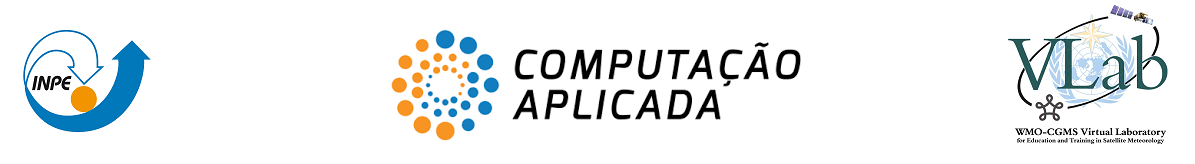

### **Contato:**
####Rogério Batista - INPE / CGCT / DISSM - (rogerio.batista@inpe.br)
####Diego Souza - INPE / CGCT / DISSM - (diego.souza@inpe.br)